#  👋 Hi There 
#  If you wanna discover our notebook ... Yalla bean-a 👏

# Dataset Information

Given a set of features extracted from the shape of the beans in images and  it's required to predict the class of a bean given some features about its shape.
There are 7 bean types in this dataset.

**Data fields**
- ID - an ID for this instance
- Area - (A), The area of a bean zone and the number of pixels within its boundaries.
- Perimeter - (P), Bean circumference is defined as the length of its border.
- MajorAxisLength - (L), The distance between the ends of the longest line that can be drawn from a bean.
- MinorAxisLength - (l), The longest line that can be drawn from the bean while standing perpendicular to the main axis.
- AspectRatio - (K), Defines the relationship between L and l.
- Eccentricity - (Ec), Eccentricity of the ellipse having the same moments as the region.
- ConvexArea - (C), Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
- EquivDiameter - (Ed), The diameter of a circle having the same area as a bean seed area.
- Extent - (Ex), The ratio of the pixels in the bounding box to the bean area.
- Solidity - (S), Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
- Roundness - (R), Calculated with the following formula: (4piA)/(P^2)
- Compactness - (CO), Measures the roundness of an object: Ed/L
- ShapeFactor1 - (SF1)
- ShapeFactor2 - (SF2)
- ShapeFactor3 - (SF3)
- ShapeFactor4 - (SF4)
- y - the class of the bean. It can be any of BARBUNYA, SIRA, HOROZ, DERMASON, CALI, BOMBAY, and SEKER.


<img src= "https://www.thespruceeats.com/thmb/eeIti36pfkoNBaipXrTHLjIv5YA=/1888x1416/smart/filters:no_upscale()/DriedBeans-56f6c2c43df78c78418c3b46.jpg" alt ="Titanic" style='width: 800px;height:400px'>

# 1. **Data Import**

In [1]:
!pip install skfeature-chappers
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting
from sklearn.metrics import confusion_matrix

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn.metrics import ConfusionMatrixDisplay
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE, ADASYN,BorderlineSMOTE,KMeansSMOTE,SVMSMOTE
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, r2_score,confusion_matrix, plot_confusion_matrix, classification_report,f1_score
sns.set(rc={'figure.figsize':(25,15)})
# for path
import os


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 1.6 MB/s eta 0:00:00


In [2]:
# train file
dataset_path = '../input/dry-beans-classification-iti-ai-pro-intake02'
df = pd.read_csv(os.path.join(dataset_path, 'train.csv'),index_col='ID')
print("The shape of the dataset is {}.\n\n".format(df.shape))

# test file
dataset_path = '../input/dry-beans-classification-iti-ai-pro-intake02/'
df_test = pd.read_csv(os.path.join(dataset_path, 'test.csv'),index_col='ID')
df_test.head()

# subission example file
dataset_path = '../input/dry-beans-classification-iti-ai-pro-intake02/'
df_subm = pd.read_csv(os.path.join(dataset_path, 'sample_submission.csv'))

The shape of the dataset is (10834, 17).




# **2- Explainatry Data Analysis - EDA**

****

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10833
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             10834 non-null  int64  
 1   Perimeter        10834 non-null  float64
 2   MajorAxisLength  10834 non-null  float64
 3   MinorAxisLength  10834 non-null  float64
 4   AspectRation     10834 non-null  float64
 5   Eccentricity     10834 non-null  float64
 6   ConvexArea       10834 non-null  int64  
 7   EquivDiameter    10834 non-null  float64
 8   Extent           10834 non-null  float64
 9   Solidity         10834 non-null  float64
 10  roundness        10834 non-null  float64
 11  Compactness      10834 non-null  float64
 12  ShapeFactor1     10834 non-null  float64
 13  ShapeFactor2     10834 non-null  float64
 14  ShapeFactor3     10834 non-null  float64
 15  ShapeFactor4     10834 non-null  float64
 16  y                10834 non-null  object 
dtypes: float64(1

In [4]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000
mean,53095.675189,855.274892,320.036169,202.410342,1.581294,0.750588,53816.205926,253.123583,0.749937,0.987152,0.873647,0.800244,0.006559,0.001718,0.644139,0.995083
std,29542.542580,214.991122,85.961630,45.113965,0.244314,0.091481,29999.710739,59.433080,0.048949,0.004626,0.059344,0.061228,0.001127,0.000593,0.098268,0.004306
min,20420.000000,524.932000,183.601165,129.576207,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.645368,0.002856,0.000564,0.416499,0.947687
25%,36343.500000,703.601250,253.501071,175.927024,1.432985,0.716250,36731.250000,215.113880,0.718778,0.985627,0.833479,0.763378,0.005888,0.001161,0.582747,0.993690
50%,44645.000000,793.739500,296.377365,192.525040,1.550761,0.764314,45148.000000,238.419335,0.760141,0.988290,0.883472,0.801428,0.006643,0.001700,0.642287,0.996397
75%,61295.000000,975.517500,376.068399,217.315195,1.703029,0.809450,62251.500000,279.362162,0.786871,0.990014,0.916883,0.834068,0.007268,0.002169,0.695670,0.997895
max,254616.000000,1985.370000,738.860153,450.926187,2.388873,0.908167,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.009897,0.003665,0.974767,0.999733


In [5]:
df['y'].value_counts()

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64

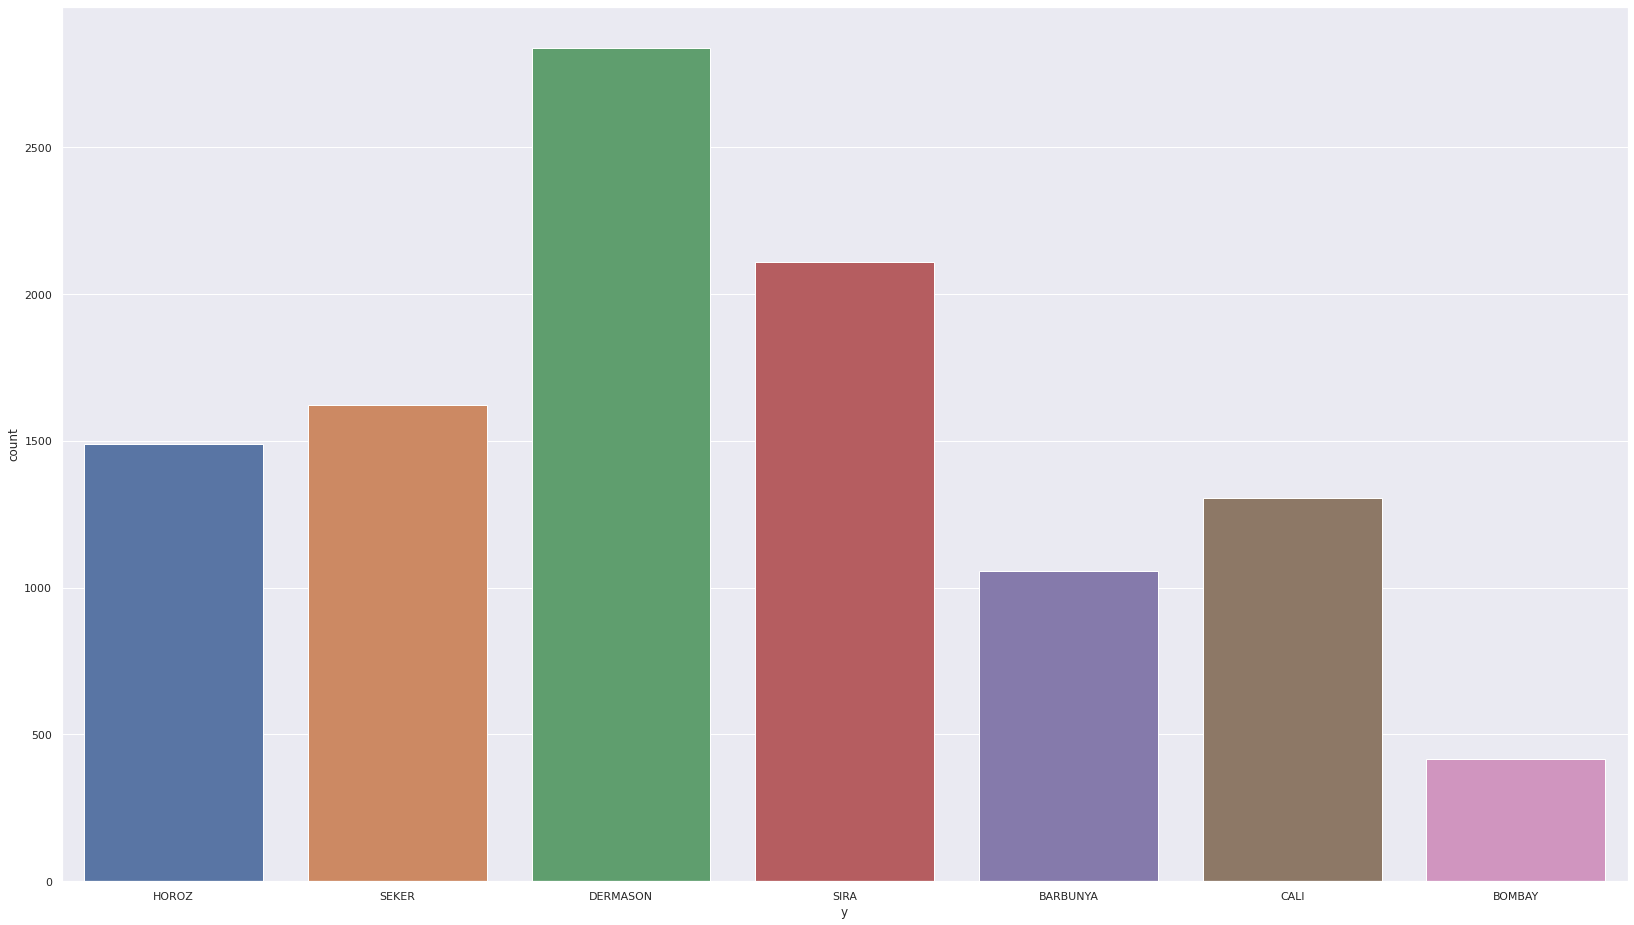

In [6]:
sns.countplot(x='y', data=df)
plt.show()

# 3. **Feature engineering**

In [7]:
# Adding Some Features to help to get better performance

# adding features for train data
df['ShapeFactor5'] = df['MajorAxisLength'] / df['Perimeter']
df['ShapeFactor6'] = df['Extent'] * df['Area']
df['ShapeFactor7'] = df['Eccentricity'] * df['Area']
df['Bounding_rectangular_area'] = df['Area']/df['Extent']
df['elipse_area']= np.pi* df['MajorAxisLength']*df['MinorAxisLength']/4
df['elipse_perimeter']= 2*np.pi * np.sqrt(((0.5*df['MajorAxisLength'])**2+(0.5*df['MinorAxisLength'])**2)/2)
df['area_diff']= df['elipse_area']-df['Area']
df['perimeter_diff']= df['elipse_perimeter']-df['Perimeter']


# adding features for test data

df_test['ShapeFactor5'] = df_test['MajorAxisLength'] / df_test['Perimeter']
df_test['ShapeFactor6'] = df_test['Extent'] * df_test['Area']
df_test['ShapeFactor7'] = df_test['Eccentricity'] * df_test['Area']
df_test['Bounding_rectangular_area'] = df_test['Area']/df_test['Extent']
df_test['elipse_area']= np.pi* df_test['MajorAxisLength']*df_test['MinorAxisLength']/4
df_test['elipse_perimeter']= 2*np.pi * np.sqrt(((0.5*df_test['MajorAxisLength'])**2+(0.5*df_test['MinorAxisLength'])**2)/2)
df_test['area_diff']= df_test['elipse_area']-df_test['Area']
df_test['perimeter_diff']= df_test['elipse_perimeter']-df_test['Perimeter']



# 4. **Data visualization**

**Viewing Featurs Correlation**

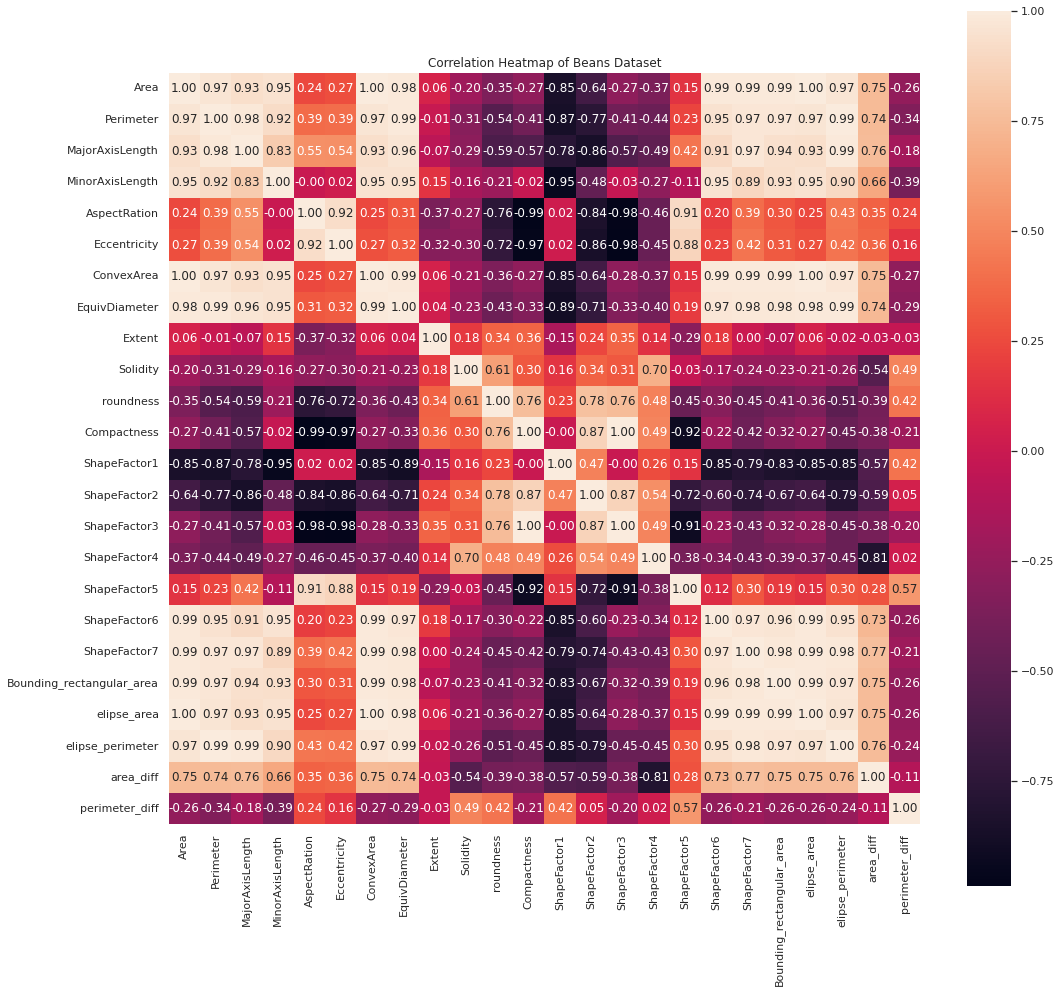

In [8]:
corr_matrix = df.corr()

plt.figure(figsize=(15,15))
plt.title('Correlation Heatmap of Beans Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=0)
plt.show()

**Features Importance**

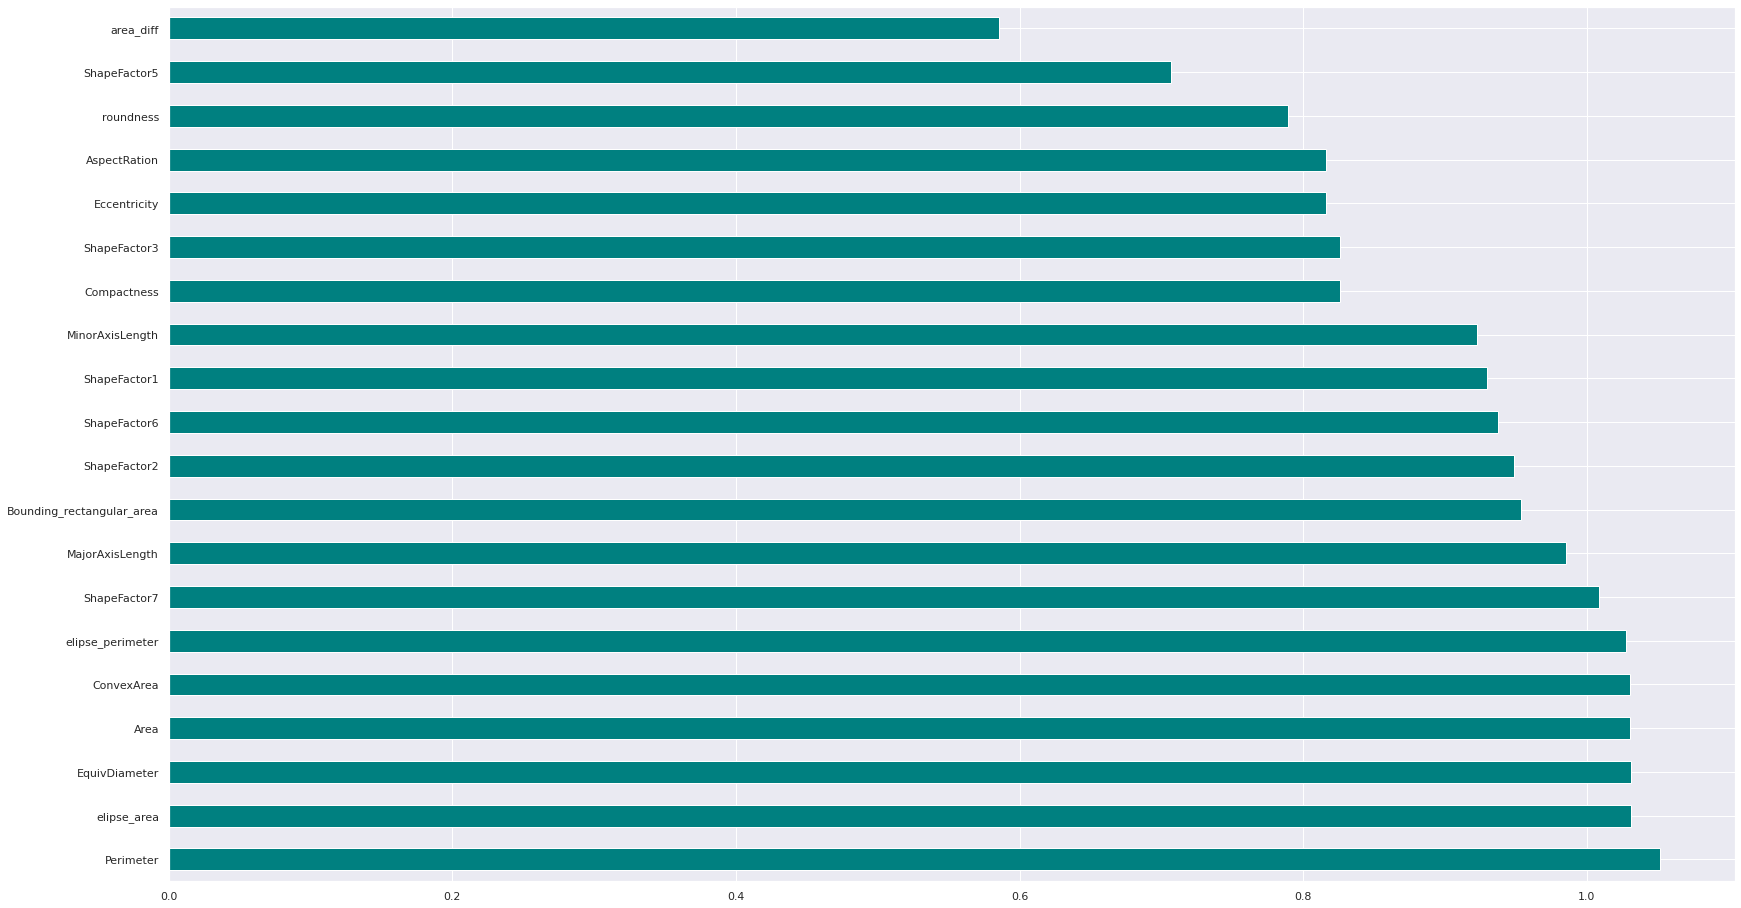

<Figure size 1800x1080 with 0 Axes>

In [9]:
xt = df.drop('y',axis =1)
yt = df['y']
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
importances=mutual_info_classif(xt,yt)
feat_importances=pd.Series(importances,xt.columns[0:len(xt.columns)])
feat_importances.nlargest(20).plot(kind='barh',color='teal')
plt.figure(figsize=(25,15))
plt.show()

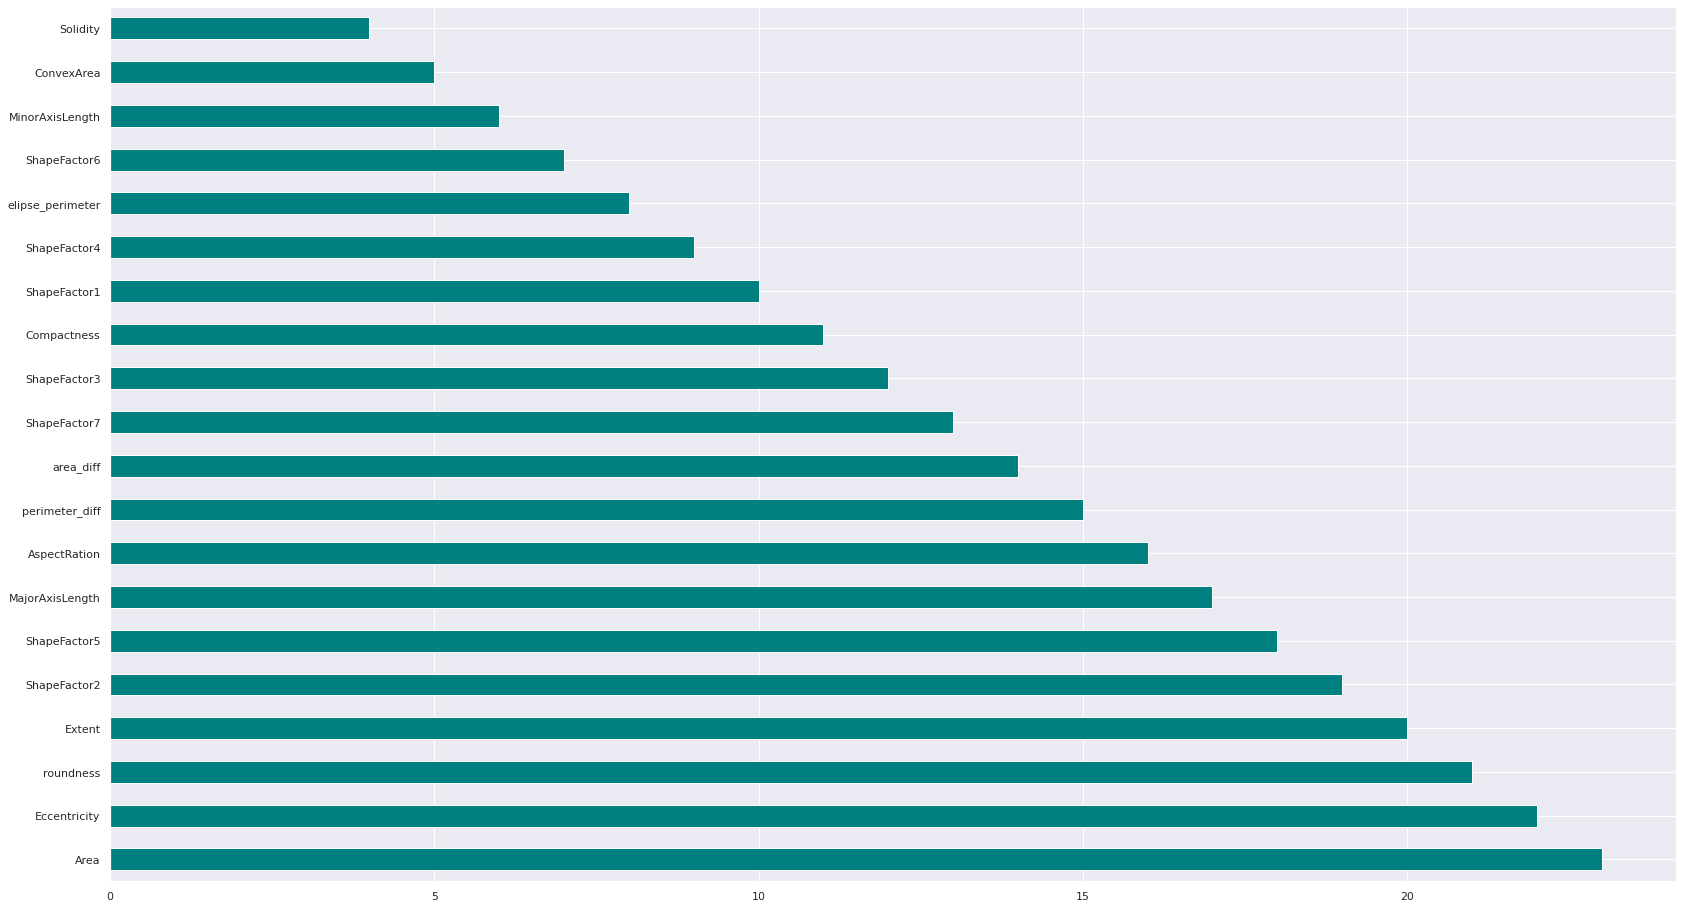

In [10]:
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt
#Calculating scores
#ranks=fisher_score.fisher_score(X_train,y_train)
ranks= fisher_score.fisher_score(df.drop('y',axis =1).to_numpy(),df['y'].to_numpy())
#Plotting the ranks
feat_importances=pd.Series(ranks,df.drop('y',axis =1).columns[0:len(df.drop('y',axis =1).columns)])
feat_importances.nlargest(20).plot(kind='barh',color='teal')
plt.show()

# 5. **Data preparation**

* ***Label Encoding***

In [11]:
le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])
df['y'].unique()

array([4, 5, 3, 6, 0, 2, 1])

In [12]:
#!pip install sklearn
## splitting trainning Data to train and validation

#all_features = df.drop('y',axis =1).columns
## splitting
#from sklearn.model_selection import cross_val_score,train_test_split

#df_train, df_val = train_test_split(df, test_size=0.1, random_state=42,stratify=df['y'])

#X_train = df_train[all_features]
#y_train = df_train['y']

#X_val = df_val[all_features]
#y_val = df_val['y']

#print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

In [13]:
# After getting our best parameters using validation set we do not need to splitting trainning data any more
# to get advantage of all training samples...

X = df.drop('y',axis =1)
y = df['y']
X_test = df_test.copy()
X_test

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,...,ShapeFactor3,ShapeFactor4,ShapeFactor5,ShapeFactor6,ShapeFactor7,Bounding_rectangular_area,elipse_area,elipse_perimeter,area_diff,perimeter_diff
ID,,,,,,,,,,,,,,,,,,,,,
10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,...,0.488266,0.962889,0.405844,35794.146006,49696.089219,92880.0,59881.224320,965.797476,2222.224320,10.363476
10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,...,0.692563,0.997956,0.364855,22081.301254,20715.631792,37490.0,28830.932669,621.888210,58.932669,-8.473790
10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,...,0.729808,0.995607,0.339019,41172.471513,37191.209202,72611.0,54918.245860,850.690407,241.245860,-60.331593
10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,...,0.689009,0.998596,0.370381,17788.742540,17970.544486,34650.0,24861.894666,578.086581,34.894666,-0.217419
10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,...,0.655462,0.991803,0.366350,114134.958450,106457.351687,176295.0,143022.328304,1397.729554,1172.328304,-35.117446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13538,66833,1018.336,400.397077,214.346215,1.867992,0.844640,67787,291.709476,0.759604,0.985927,...,0.530786,0.991504,0.393188,50766.615396,56449.851077,87984.0,67405.696009,1008.891846,572.696009,-9.444154
13539,40572,725.331,250.714014,206.471935,1.214276,0.567264,40900,227.283688,0.767479,0.991980,...,0.821825,0.997923,0.345655,31138.150424,23015.054574,52864.0,40656.456087,721.500719,84.456087,-3.830281
13540,61226,1008.378,408.227467,199.385082,2.047432,0.872611,63901,279.204879,0.611648,0.958138,...,0.467780,0.957748,0.404836,37448.781978,53426.454493,100100.0,63927.064974,1009.238965,2701.064974,0.860965


* ***Data Preprocessing***

In [14]:
def scale_features(scaler,X,isTest = False):
    X_cp = X.copy()
    if(isTest):
        X_scaled = scaler.transform(X)
    else:
        X_scaled = scaler.fit_transform(X)
        
    scaled_df = pd.DataFrame(X_scaled,index=X_cp.index)
    scaled_df.columns = X_cp.columns
    return scaled_df

In [15]:
# Scalling 
# we choose RobustScaler as it handle outliers well
from sklearn.preprocessing import PowerTransformer,RobustScaler,StandardScaler

#scaler = StandardScaler()
#scaler = PowerTransformer(method='box-cox')
scaler = RobustScaler()

#X_train = scale_features(scaler,X_train)
#X_val = scale_features(scaler,X_val,True)

X_train = scale_features(scaler,X)
X_test = scale_features(scaler,df_test,True)
X_train

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,...,ShapeFactor3,ShapeFactor4,ShapeFactor5,ShapeFactor6,ShapeFactor7,Bounding_rectangular_area,elipse_area,elipse_perimeter,area_diff,perimeter_diff
ID,,,,,,,,,,,,,,,,,,,,,
0,0.544777,0.653008,0.822611,-0.134810,2.125342,1.266132,0.541883,0.527444,-2.281944,-0.187074,...,-1.525751,0.522756,1.409726,0.118116,0.699556,0.979320,0.534534,0.726527,-0.278952,0.759212
1,-0.005210,-0.132903,-0.251184,0.518081,-1.146089,-1.844348,-0.014420,-0.005407,0.170410,1.320036,...,1.427720,0.231459,-0.923778,0.069386,-0.282472,-0.044235,-0.007077,-0.105829,-0.155404,0.466394
2,-0.520329,-0.514704,-0.460767,-0.582377,-0.467863,-0.559845,-0.513866,-0.585815,0.606030,0.022075,...,0.515092,0.318841,-0.269052,-0.436178,-0.432603,-0.525891,-0.517469,-0.513241,-0.314296,0.263788
3,-0.235136,-0.219625,-0.227884,-0.204482,-0.341812,-0.390431,-0.232756,-0.252418,0.088051,0.169199,...,0.379505,0.678516,-0.317999,-0.192119,-0.209607,-0.231512,-0.237581,-0.238154,-0.463118,-0.367538
4,-0.084764,-0.067434,-0.123724,0.017199,-0.353592,-0.405610,-0.083071,-0.088966,-0.445350,0.030919,...,0.376076,0.026261,-0.440091,-0.117252,-0.104740,-0.028492,-0.084369,-0.104573,-0.044934,-0.857487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10829,-0.275254,-0.285869,-0.376958,0.004325,-0.935135,-1.358423,-0.273273,-0.297348,0.152410,0.298521,...,1.117794,0.311838,-0.970360,-0.225974,-0.372021,-0.273574,-0.274908,-0.320586,-0.262066,-0.635259
10830,-0.499289,-0.463814,-0.396505,-0.646034,-0.208108,-0.226761,-0.492393,-0.560012,-0.416126,-0.094299,...,0.223425,0.297061,-0.101472,-0.538615,-0.378695,-0.407286,-0.496531,-0.470684,-0.299823,0.058145
10831,1.490572,1.111362,1.121513,1.183961,0.908998,0.712292,1.465738,1.313311,0.174105,0.689293,...,-0.785281,-0.471938,0.886921,1.692115,1.351192,1.236594,1.483292,1.215554,1.038427,1.001006


In [16]:
X_test

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,...,ShapeFactor3,ShapeFactor4,ShapeFactor5,ShapeFactor6,ShapeFactor7,Bounding_rectangular_area,elipse_area,elipse_perimeter,area_diff,perimeter_diff
ID,,,,,,,,,,,,,,,,,,,,,
10834,0.521572,0.594648,0.745551,0.099080,1.560107,1.047026,0.589336,0.506322,-2.046469,-6.907949,...,-1.363941,-7.967580,1.286056,0.150452,0.633272,0.888677,0.596313,0.690530,7.181309,1.248629
10835,-0.636154,-0.600838,-0.541634,-0.795292,-0.406601,-0.475544,-0.627776,-0.731851,0.107458,-0.109056,...,0.445220,0.370789,-0.352603,-0.621561,-0.504530,-0.579376,-0.632334,-0.625180,-0.359144,-0.178547
10836,0.402060,0.431318,0.101793,0.818435,-0.690836,-0.902521,0.419667,0.395821,-0.104683,-2.150044,...,0.775044,-0.187713,-1.385463,0.453244,0.142318,0.351469,0.399930,0.250159,0.276334,-4.107472
10837,-0.794261,-0.792286,-0.670527,-1.080910,-0.375636,-0.434364,-0.784749,-0.943610,-0.640782,0.001404,...,0.413749,0.523101,-0.131698,-0.863226,-0.612305,-0.654647,-0.789388,-0.792753,-0.442931,0.446984
10838,3.895758,2.350384,1.864658,3.730193,-0.139327,-0.148295,3.860934,2.903764,0.653170,-0.234100,...,0.116669,-1.092257,-0.292841,4.560927,2.861775,3.099502,3.886173,2.342991,3.521751,-2.197161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13538,0.889245,0.825977,0.848674,0.527232,1.174739,0.861875,0.887099,0.829441,-0.007883,-0.538795,...,-0.987406,-1.163459,0.780064,0.993381,0.898431,0.758914,0.894053,0.855398,1.431650,-0.252065
13539,-0.163237,-0.251579,-0.372557,0.336978,-1.246033,-2.114257,-0.166456,-0.173322,0.107764,0.841010,...,1.589905,0.362886,-1.120192,-0.111673,-0.414252,-0.171905,-0.164403,-0.244088,-0.270178,0.173262
13540,0.664529,0.789355,0.912561,0.165749,1.839222,1.161984,0.734828,0.634811,-2.180725,-6.872231,...,-1.545357,-9.190226,1.245730,0.243606,0.779729,1.080035,0.756405,0.856726,8.850374,0.528686


# 6. **Dimensionality Reduction**

* ***Applying PCA***

[0.57217554 0.77539171 0.89696279 0.95921658 0.9772034  0.98584311
 0.99280117 0.99649164 0.99911867 0.99941369 0.99968518 0.99988081
 0.99994081 0.99997775 0.99998835 0.99999548 0.99999804 0.99999967
 0.99999993 0.99999999 1.         1.         1.         1.        ]
7


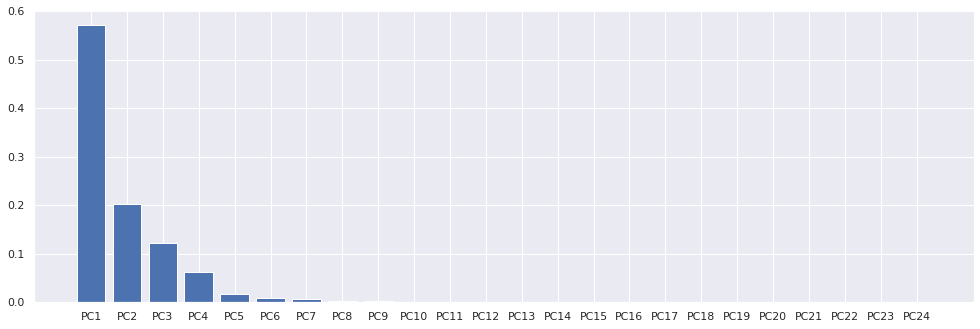

In [17]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42)
pca.fit(X_train)
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC" + str(i) for i in list(range(1, num_pc + 1))]
f, ax = plt.subplots(figsize=(15,5))
plt.bar(x=pc_list, height=pca.explained_variance_ratio_)
cumsum = np.cumsum(pca.explained_variance_ratio_)
print(cumsum)
# getting the best dimension
best_dim = np.argmax(cumsum >= 0.99) + 1
print(best_dim)

In [18]:
model_columns = X_train.columns.difference(['y'])

# Choose n_components = 7
pca = PCA(n_components=7, random_state=22)

X_pca = pca.fit_transform(X_train[model_columns])
#X_val_pca = pca.transform(X_val[model_columns])
X_test_pca = pca.transform(X_test[model_columns])

X_pca=pd.DataFrame(X_pca)
X_pca.columns =['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7']

#X_val_pca=pd.DataFrame(X_val_pca)
#X_val_pca.columns =['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7']

X_test_pca=pd.DataFrame(X_test_pca)
X_test_pca.columns =['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7']

X_test_pca

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7
0,5.056450,-5.654258,5.175329,8.805691,1.435260,-0.718836,0.973929
1,-3.526497,0.321404,0.105664,0.201901,-0.238268,0.684493,0.042585
2,0.713144,3.713507,2.733832,0.057341,0.027753,-0.214881,0.724088
3,-4.269799,-0.296811,-0.154676,0.264030,0.484240,1.067005,0.076317
4,10.376317,2.593250,-2.062136,0.138874,-0.378205,0.192639,-0.226059
...,...,...,...,...,...,...,...
2704,2.636485,-1.887329,0.532355,-0.235277,-0.444548,-0.373621,-0.180524
2705,-2.685092,2.528735,-2.099368,0.837428,0.398844,-0.476271,-0.056169
2706,6.398395,-5.896609,6.113555,9.874991,1.509226,-0.765839,-0.224761
2707,-2.473802,0.253488,0.780824,-0.094934,0.280935,0.424556,0.177491


In [19]:
# If PCA is applied
X_train = X_pca
#X_val = X_val_pca
X_test = X_test_pca
model_columns = X_pca.columns
model_columns

Index(['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7'], dtype='object')

***

# 7. **Modeling**

* ***Our data is getting ready***

In [20]:
# a dataframe for comparing validation accuracy
#acc_pred_test = pd.DataFrame ({'Model':'Model_name'
#    ,'Score': ['Model_score']
#    })

In [21]:
# a function that used for comparing validation scores of the models.
'''
def evaluate_model(model,X_train,y_train,X_val,y_val,display_cm = False, model_name = 'model_name'):
    c_labels = le.inverse_transform([0,1,2,3,4,5,6])
    
    # fitting
    model.fit(X_train, y_train)
    
    # predict
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    print("#################### Train Evaluation ######################")
    print("")
    print('Mean_F1_score', f1_score(y_train, y_train_pred, average='micro'))
    print("Classification Report: \n", classification_report(y_train, y_train_pred))
    #new_row = {'model_name': model_name ,'Score': f1_score(y_train, y_train_pred, average='micro')}
    #acc_pred_test.loc[len(acc_pred_test.index)] = [model_name, f1_score(y_val, y_val_pred, average='micro')]
    print("")
    print("#################### Validation Evaluation ######################")
    print("")
    print("Mean_F1_score: ", f1_score(y_val, y_val_pred, average='micro'))
    print("Classification Report: \n", classification_report(y_val, y_val_pred))
    
    if(display_cm):
        
        cm = confusion_matrix(y_val, y_val_pred)

        ax = sns.heatmap(cm,cmap='Blues', annot=True, fmt='')

        ax.set_title('Confusion Matrix with labels\n\n');

        ## Ticket labels - List must be in alphabetical order
        ax.xaxis.set_ticklabels(c_labels)
        ax.yaxis.set_ticklabels(c_labels)
        plt.xticks(rotation=90)
        plt.yticks(rotation=0)
        plt.show()
'''

'\ndef evaluate_model(model,X_train,y_train,X_val,y_val,display_cm = False, model_name = \'model_name\'):\n    c_labels = le.inverse_transform([0,1,2,3,4,5,6])\n    \n    # fitting\n    model.fit(X_train, y_train)\n    \n    # predict\n    y_train_pred = model.predict(X_train)\n    y_val_pred = model.predict(X_val)\n    \n    print("#################### Train Evaluation ######################")\n    print("")\n    print(\'Mean_F1_score\', f1_score(y_train, y_train_pred, average=\'micro\'))\n    print("Classification Report: \n", classification_report(y_train, y_train_pred))\n    #new_row = {\'model_name\': model_name ,\'Score\': f1_score(y_train, y_train_pred, average=\'micro\')}\n    #acc_pred_test.loc[len(acc_pred_test.index)] = [model_name, f1_score(y_val, y_val_pred, average=\'micro\')]\n    print("")\n    print("#################### Validation Evaluation ######################")\n    print("")\n    print("Mean_F1_score: ", f1_score(y_val, y_val_pred, average=\'micro\'))\n    print

**Training and Evaluating For Models**

**1-XGB**

In [22]:
# xgb_model 
import xgboost as xgb

xgb_model= xgb.XGBClassifier(random_state=42,
                             objective='multi:softproba'
                             ,n_estimators=63,num_class=7, 
                             max_depth=7, learning_rate=0.09,
                             gamma=0.5,colsample_bytree=0.9,
                             min_child_weight=2,
                             sampling_method='gradient_based'
                            )

#evaluate_model(xgb_model,X_train,y_train,X_val,y_val,True,'xgb')

# fitting
xgb_model.fit(X_pca, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.09, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=2,
              missing=nan, monotone_constraints='()', n_estimators=63, n_jobs=0,
              num_class=7, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=42, ...)

In [23]:
y_pred_xgb = xgb_model.predict(X_test_pca)
y_pred_xgb

array([4, 3, 0, ..., 4, 3, 6])

**2-LGB**

In [24]:
from lightgbm import LGBMClassifier

#lgb_model
lgb_model = LGBMClassifier(objective='multiclass',
                           random_state=42,
                           learning_rate=0.05, 
                           reg_alpha=0.005
                          ) 

#evaluate_model(xgb_model,X_train,y_train,X_val,y_val,True,'lgb')

# fitting
lgb_model.fit(X_pca, y)

LGBMClassifier(learning_rate=0.05, objective='multiclass', random_state=42,
               reg_alpha=0.005)

In [25]:
y_pred_lgb = xgb_model.predict(X_test_pca)
y_pred_lgb

array([4, 3, 0, ..., 4, 3, 6])

**3-SVC**

In [26]:
from sklearn.svm import SVC

#svc_model
svc_model = SVC(C=25,
                kernel='rbf',
                tol=1e-6, 
                random_state=42, 
                decision_function_shape='ovr',
                probability=True) 

# evaluate_model(svc_model,X_train,y_train,X_val,y_val,True,'SVC')

# fitting
svc_model.fit(X_pca, y)

SVC(C=25, probability=True, random_state=42, tol=1e-06)

In [27]:
y_pred_svc = svc_model.predict(X_test_pca)
y_pred_svc

array([4, 3, 0, ..., 4, 3, 6])

In [28]:
# Grid search example for tuning  hyper parameters of the svc model
# from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':('linear', 'rbf'),
#               'C':[1, 10]
#              }
# svc_params_to_be_searched = {'kernel': ('rbf','sigmoid'),
#                              'C': [1, 10, 25], 
#                              'gamma' : [0.1,0.01,0.001],
#                             }
# grid = GridSearchCV(SVC(),svc_params_to_be_searched,refit=True,verbose=2)
# grid.fit(X_train,y_train)
# print(grid.best_params_)
# print(grid.best_estimator_)
# # {'C': [10,17.5], 'kernel': ('linear', 'rbf'),'gamma': [0.01,0.001]}
# #sorted(clf.cv_results_.keys())

**4-MLP**

In [29]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(activation='relu',
                          alpha=0.0001, 
                          batch_size='auto', 
                          learning_rate_init=0.001, 
                          max_iter=600,                
                          random_state=42, 
                          shuffle=True, 
                          solver='adam',                
                          tol=0.0001, 
                          validation_fraction=0.1, 
                         )

#evaluate_model(mlp_model,X_train,y_train,X_val,y_val,True,'MLP')

# fitting
mlp_model.fit(X_pca, y)


MLPClassifier(max_iter=600, random_state=42)

In [30]:
y_pred_mlp = mlp_model.predict(X_test_pca)
y_pred_mlp

array([4, 3, 0, ..., 4, 3, 6])

**5-Extra Tree Classifier**

In [31]:
from sklearn.ensemble import ExtraTreesClassifier

exc_model = ExtraTreesClassifier(bootstrap=False, 
                                 criterion='gini', 
                                 max_features='auto',
                                 min_samples_split=2,
                                 n_estimators=101, 
                                 n_jobs=-1,
                                 random_state=123, 
                                 verbose=0,
                                 warm_start=False
                                ) 

# evaluate_model(exc_model,X_train,y_train,X_val,y_val,True,'ExtraTrees')
# fitting
exc_model.fit(X_pca, y)

ExtraTreesClassifier(n_estimators=101, n_jobs=-1, random_state=123)

In [32]:
y_pred_exc = exc_model.predict(X_test)
y_pred_exc

array([4, 3, 0, ..., 4, 3, 6])

**Models Voting**

In [33]:
classifiers = [

                ('SVC:', svc_model),
                 ('LGB:', lgb_model),
                ('XGB:', xgb_model),
                #('CatB:', cb_model),
                ('MLP:', mlp_model),
                ('EXtra:', exc_model),
                #('DT:', dt_model),
                #('Knn:', Knn_model),
                ]

vc = VotingClassifier(estimators=classifiers)

# evaluate_model(vc,X_train,y_train,X_val,y_val,True,'Voting')

# fitting
vc.fit(X_pca, y)

VotingClassifier(estimators=[('SVC:',
                              SVC(C=25, probability=True, random_state=42,
                                  tol=1e-06)),
                             ('LGB:',
                              LGBMClassifier(learning_rate=0.05,
                                             objective='multiclass',
                                             random_state=42,
                                             reg_alpha=0.005)),
                             ('XGB:',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.9,
                                            early_stopping_rounds=None,
                                            enab...
                                            max_delta_step=0, max_depth=7,
                

In [34]:
y_pred_voting = vc.predict(X_test_pca)
df_subm['y'] = le.inverse_transform(y_pred_voting)

**Models Stacking**

In [35]:
"""
from sklearn.ensemble import StackingClassifier
estimators = [

                ('SVC:', svc_model),
                 ('LGB:', lgb_model),
                ('XGB:', xgb_model),
                #('CatB:', cb_model),
                ('MLP:', mlp_model),
                ('Extra:', exc_model),
                #('DT:', dt_model),
                #('KNN:', knn_model),
                ]

sclf = StackingClassifier(estimators=estimators, final_estimator=svc_model)

# evaluate_model(sclf,X_train,y_train,X_val,y_val,True,'Stacking')

# fitting
sclf.fit(X_pca, y)
y_pred_stacking = sclf.predict(X_test_pca)
y_pred_stacking
"""

"\nfrom sklearn.ensemble import StackingClassifier\nestimators = [\n\n                ('SVC:', svc_model),\n                 ('LGB:', lgb_model),\n                ('XGB:', xgb_model),\n                #('CatB:', cb_model),\n                ('MLP:', mlp_model),\n                ('Extra:', exc_model),\n                #('DT:', dt_model),\n                #('KNN:', knn_model),\n                ]\n\nsclf = StackingClassifier(estimators=estimators, final_estimator=svc_model)\n\n# evaluate_model(sclf,X_train,y_train,X_val,y_val,True,'Stacking')\n\n# fitting\nsclf.fit(X_pca, y)\ny_pred_stacking = sclf.predict(X_test_pca)\ny_pred_stacking\n"

**Comparing results during Validation**

In [36]:
#acc_pred_test[1:].sort_values(by='Score', ascending =False)

***

# 8. **Make a submission**

In [37]:
# making a submission using the selected model
# We Selected Voting Classifier of the best 5 models
y_test_predicted = vc.predict(X_test)
df_subm['y'] = le.inverse_transform(y_test_predicted)
df_subm['y'].value_counts()
df_subm[['ID', 'y']].to_csv('/kaggle/working/submission.csv', index=False)